In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pycountry
import tqdm

from result_funcs import get_result_paths

def get_video_df(result_df):
    result_df['id'] = result_df['return'].map(lambda r: r['id'] if r and 'id' in r else None)
    video_df = result_df[result_df['id'].map(lambda i: i is not None)]
    
    return video_df

In [5]:
data_dir_path = os.path.join("..", "data", "results", "2024_04_10", "hours", "19")
result_paths = list(get_result_paths(data_dir_path))
result_paths = sorted(result_paths)

def extract_video_data(df):
    df['id'] = df['return'].map(lambda r: r['id'])
    df['desc'] = df['return'].map(lambda r: r['desc'])
    df['authorUniqueId'] = df['return'].map(lambda r: r['author']['uniqueId'] if r['author'] else None)
    df['commentCount'] = df['return'].map(lambda r: int(r['stats']['commentCount']) if r['stats'] else None)
    df['diggCount'] = df['return'].map(lambda r: int(r['stats']['diggCount']) if r['stats'] else None)
    df['shareCount'] = df['return'].map(lambda r: int(r['stats']['shareCount']) if r['stats'] else None)
    df['playCount'] = df['return'].map(lambda r: int(r['stats']['playCount']) if r['stats'] else None)
    df['videoDuration'] = df['return'].map(lambda r: r['video']['duration'])
    df['isImagePost'] = df['return'].map(lambda r: 'imagePost' in r)
    df['numImages'] = df['return'].map(lambda r: len(r['imagePost']['images']) if 'imagePost' in r and r['imagePost'] else 0)
    df['locationCreated'] = df['return'].map(lambda r: r['locationCreated'])
    df = df[['id', 'desc', 'authorUniqueId', 'commentCount', 'diggCount', 'shareCount', 'playCount', 'videoDuration', 'isImagePost', 'numImages', 'locationCreated']]
    return df

def extract_error_data(df):
    df = df[df['return'].map(lambda r: 'statusCode' in r and r['statusCode'] is not None)]
    df['statusCode'] = df['return'].map(lambda r: int(r['statusCode']))
    df['statusMsg'] = df['return'].map(lambda r: r['statusMsg'])
    df = df[['statusCode', 'statusMsg']]
    return df

video_df = None
error_df = None
result_paths = result_paths[:10]
for result_path in tqdm.tqdm(result_paths):
    batch_result_df = pd.read_parquet(result_path, columns=['result', 'args'])
    batch_result_df['return'] = batch_result_df['result'].map(lambda r: r['return'])
    batch_result_df = batch_result_df.drop(columns=['result'])
    batch_error_df = extract_error_data(batch_result_df)
    batch_df = get_video_df(batch_result_df)
    batch_df = extract_video_data(batch_df)

    if video_df is None:
        video_df = batch_df
    else:
        video_df = pd.concat([video_df, batch_df])

    if error_df is None:
        error_df = batch_error_df
    else:
        error_df = pd.concat([error_df, batch_error_df])

  0%|          | 0/10 [00:00<?, ?it/s]

/tmp/ipykernel_543050/1707465876.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['statusCode'] = df['return'].map(lambda r: int(r['statusCode']))
/tmp/ipykernel_543050/1707465876.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['statusMsg'] = df['return'].map(lambda r: r['statusMsg'])
/tmp/ipykernel_543050/1707465876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

KeyboardInterrupt: 

In [5]:
df['desc'] = df['return'].map(lambda r: r['desc'])
df['authorUniqueId'] = df['return'].map(lambda r: r['author']['uniqueId'] if r['author'] else None)
df['commentCount'] = df['return'].map(lambda r: int(r['stats']['commentCount']) if r['stats'] else None)
df['diggCount'] = df['return'].map(lambda r: int(r['stats']['diggCount']) if r['stats'] else None)
df['shareCount'] = df['return'].map(lambda r: int(r['stats']['shareCount']) if r['stats'] else None)
df['playCount'] = df['return'].map(lambda r: int(r['stats']['playCount']) if r['stats'] else None)
df['videoDuration'] = df['return'].map(lambda r: r['video']['duration'])
df['isImagePost'] = df['return'].map(lambda r: 'imagePost' in r)
df['numImages'] = df['return'].map(lambda r: len(r['imagePost']['images']) if 'imagePost' in r and r['imagePost'] else 0)
df['locationCreated'] = df['return'].map(lambda r: r['locationCreated'])
df[['authorUniqueId', 'desc', 'commentCount', 'diggCount', 'shareCount', 'playCount', 'videoDuration', 'isImagePost', 'numImages', 'locationCreated']].head()

,authorUniqueId,desc,commentCount,diggCount,shareCount,playCount,videoDuration,isImagePost,numImages,locationCreated
1962,izaangarciiaa__,#foryougymtok #parati #cambiofisico #1year,2.0,53.0,0.0,1447.0,0.0,True,3,ES
1979,juju._books,#pourtoi #foryou #BookTok #Clubdeslecteurs #bo...,0.0,46.0,0.0,307.0,0.0,True,3,FR
2064,agya.chota.puruna,,0.0,0.0,0.0,2.0,53.0,True,0,LT
2081,christos.a..chask,,0.0,5.0,0.0,812.0,20.0,True,0,GR
2354,tocabocavideos50,#dúo con @tocabocaLHP #toca,0.0,9.0,0.0,77.0,63.0,True,0,DO


In [27]:
print(f"Number of unique users: {len(df['authorUniqueId'].unique())}")
print(f"Average number of comments: {df['commentCount'].mean()}")
print(f"Average number of likes: {df['diggCount'].mean()}")
print(f"Average number of shares: {df['shareCount'].mean()}")
print(f"Average number of plays: {df['playCount'].mean()}")
print(f"Average video duration: {df['videoDuration'].mean()}")

Number of unique users: 12497
Average number of comments: 4.108892058963385
Average number of likes: 152.07695355840863
Average number of shares: 5.138135996195911
Average number of plays: 2250.7939451577113
Average video duration: 23.005468378506894


In [6]:
df['locationCreated'].value_counts()

locationCreated
PK    1884
US    1048
BD     930
ID     575
SA     426
      ... 
ME       1
BI       1
XK       1
CV       1
BS       1
Name: count, Length: 161, dtype: int64

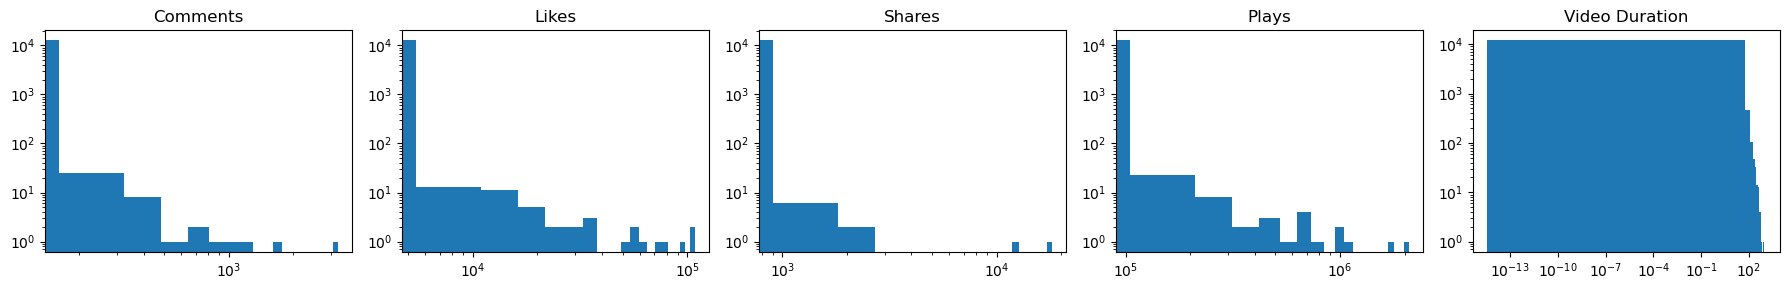

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 3))
cols = ['commentCount', 'diggCount', 'shareCount', 'playCount', 'videoDuration']
titles = ['Comments', 'Likes', 'Shares', 'Plays', 'Video Duration']
for i in range(5):
    bins = 20
    # col_data = df[df[cols[i]].notna()][cols[i]]
    # hist, bins = np.histogram(col_data, bins=bins)
    # logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    axes[i].hist(df[cols[i]], bins=20)#logbins)
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [7]:
country_df = df[['id', 'locationCreated']].groupby('locationCreated').count().reset_index()
country_df['count'] = country_df['id']
country_df = country_df[country_df['locationCreated'].map(lambda c: c is not None)]
def get_alpha_3(alpha_2):
    try:
        return pycountry.countries.get(alpha_2=alpha_2).alpha_3
    except:
        extra_map = {
            'XK': 'UNK'
        }
        if alpha_2 in extra_map:
            return extra_map[alpha_2]
        else:
            print(f"Couldn't find {alpha_2}")
            return None
country_df['iso_alpha'] = country_df['locationCreated'].map(get_alpha_3)
fig = px.choropleth(country_df, locations="iso_alpha",
                    color="count", # lifeExp is a column of gapminder
                    # hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Couldn't find FAKE-AD


In [11]:
pop_df = pd.read_csv(os.path.join('..', 'data', 'worlddata', 'API_SP.POP.TOTL_DS2_en_csv_v2_281770', 'API_SP.POP.TOTL_DS2_en_csv_v2_281770.csv'), header=2)
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN,NaN


In [12]:

country_df['count_per_capita'] = country_df['count'] / pop_df['2022']
fig = px.choropleth(country_df, locations="iso_alpha",
                    color="count_per_capita", # lifeExp is a column of gapminder
                    # hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()